# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
import numpy as np

## Load the Data

In [300]:
df = pd.read_csv('/content/drive/MyDrive/Colab/T5Bootcamp/Week 4/4- Deep learning/1-Weekly Task/Datasets/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [301]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [302]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [304]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [305]:
df.shape

(52000, 26)

In [306]:
df.dropna().shape

(50029, 26)

In [307]:
df.shape[0]-df.dropna().shape[0]

1971

In [308]:
df.dropna(inplace=True)

In [309]:
df.duplicated().sum()

43

In [310]:
df.drop_duplicates(inplace=True)

In [311]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,49986.000000,4.998600e+04,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000,49986.000000
mean,440213.329892,2.996927e+05,-1.428230,52.585159,30.463890,2.837034,1.834554,1.354439,4.127436,350.236626,4.079722,997.981435,39.149062,2.676069,383.781459,1.360341,2009.400432
std,95172.948041,1.613476e+05,1.399155,1.452909,25.539752,0.402714,0.728913,0.855224,1.925211,259.484737,1.427753,1805.612378,14.212079,3.204718,1302.334069,0.480146,3.007918
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375387.750000,1.779800e+05,-2.367708,51.487337,7.000000,3.000000,1.000000,1.000000,2.000000,114.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,441095.000000,2.668050e+05,-1.390462,52.291736,30.000000,3.000000,2.000000,1.000000,4.000000,324.000000,4.000000,129.000000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523467.500000,3.979888e+05,-0.215341,53.476533,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,720.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


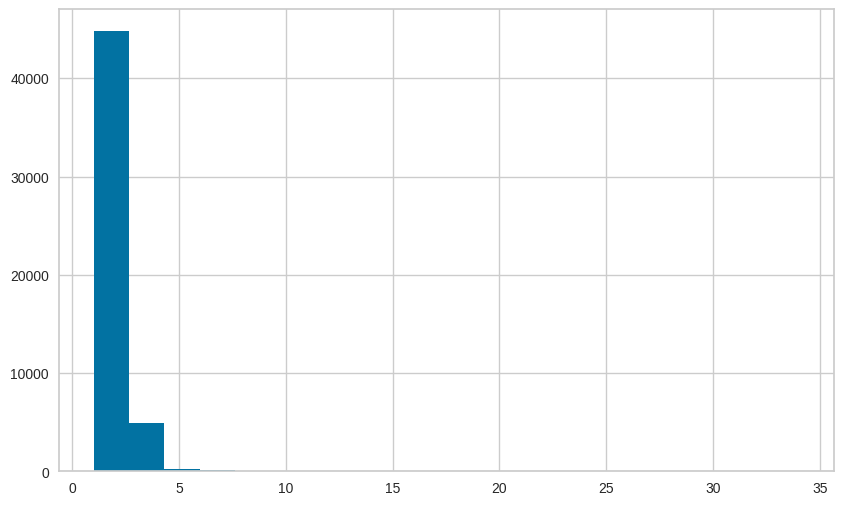

In [312]:
plt.figure(figsize=(10,6))
plt.hist(df['Number_of_Vehicles'],bins=20)
plt.show()

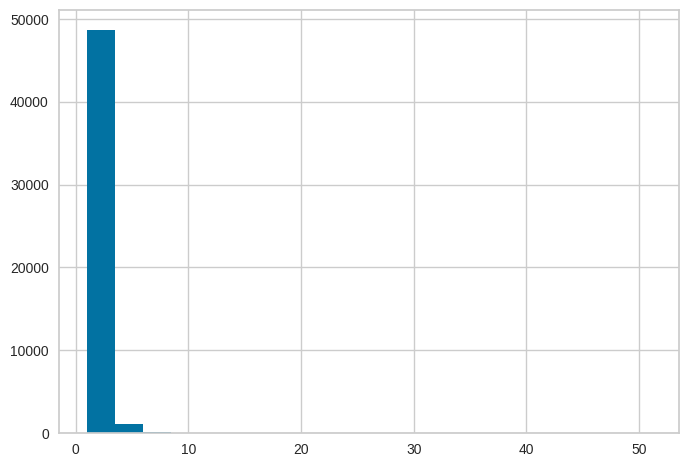

In [313]:
plt.hist(df['Number_of_Casualties'],bins=20)
plt.show()

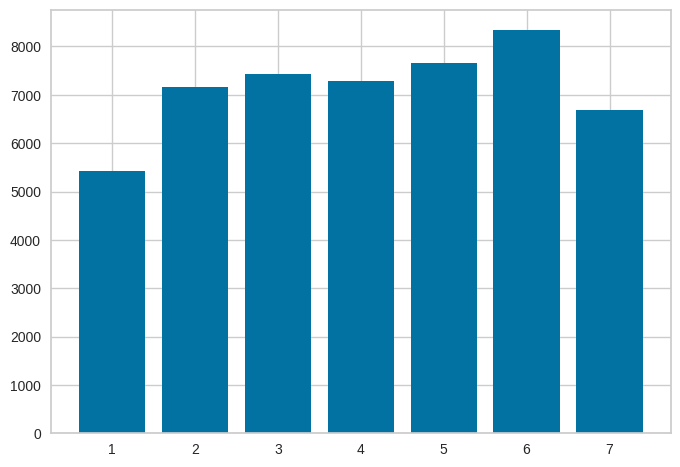

In [314]:
plt.bar(df['Day_of_Week'].value_counts().index,df['Day_of_Week'].value_counts().values)
plt.show()

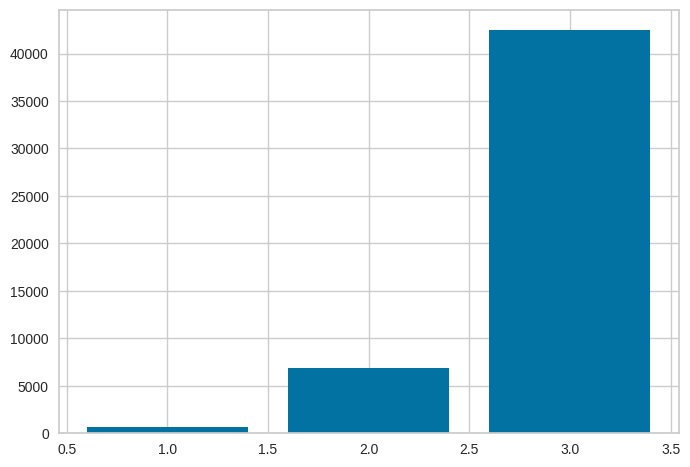

In [315]:
plt.bar(df['Accident_Severity'].value_counts().index,df['Accident_Severity'].value_counts().values)
plt.show()

In [316]:
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print()

Date
04/11/2005    40
14/08/2007    34
24/10/2009    33
25/06/2007    33
26/08/2011    32
              ..
31/12/2010     3
21/02/2013     2
24/03/2013     2
31/12/2014     2
03/02/2013     1
Name: count, Length: 3286, dtype: int64

Local_Authority_(Highway)
E10000016    1409
E10000030    1274
E10000017    1137
E10000014    1029
E10000012    1010
             ... 
S12000005      29
S12000027      13
EHEATHROW      12
S12000013       6
S12000023       5
Name: count, Length: 206, dtype: int64

Road_Type
Single carriageway    37334
Dual carriageway       7434
Roundabout             3346
One way street         1058
Slip road               527
Unknown                 287
Name: count, dtype: int64

Pedestrian_Crossing-Human_Control
None within 50 metres                 49711
Control by other authorised person      158
Control by school crossing patrol       117
Name: count, dtype: int64

Pedestrian_Crossing-Physical_Facilities
No physical crossing within 50 meters          41705
Pedestrian p

In [317]:
df.drop(columns=['Pedestrian_Crossing-Human_Control'],inplace=True)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [318]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-318-b9c6864122be>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        49986 non-null  float64       
 1   Location_Northing_OSGR                       49986 non-null  float64       
 2   Longitude                                    49986 non-null  float64       
 3   Latitude                                     49986 non-null  float64       
 4   Police_Force                                 49986 non-null  int64         
 5   Accident_Severity                            49986 non-null  float64       
 6   Number_of_Vehicles                           49986 non-null  int64         
 7   Number_of_Casualties                         49986 non-null  float64       
 8   Date                                         49986 non-null  datetime64[ns]
 9   

In [320]:
df['Month'] = df['Date'].dt.month

In [321]:
df.drop(columns=['Date'],inplace=True)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49986 non-null  float64
 1   Location_Northing_OSGR                       49986 non-null  float64
 2   Longitude                                    49986 non-null  float64
 3   Latitude                                     49986 non-null  float64
 4   Police_Force                                 49986 non-null  int64  
 5   Accident_Severity                            49986 non-null  float64
 6   Number_of_Vehicles                           49986 non-null  int64  
 7   Number_of_Casualties                         49986 non-null  float64
 8   Day_of_Week                                  49986 non-null  int64  
 9   Local_Authority_(District)                   49986 non-null  int64  
 10  Loc

In [323]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = label_encoder.fit_transform(df[col])

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49986 non-null  float64
 1   Location_Northing_OSGR                       49986 non-null  float64
 2   Longitude                                    49986 non-null  float64
 3   Latitude                                     49986 non-null  float64
 4   Police_Force                                 49986 non-null  int64  
 5   Accident_Severity                            49986 non-null  float64
 6   Number_of_Vehicles                           49986 non-null  int64  
 7   Number_of_Casualties                         49986 non-null  float64
 8   Day_of_Week                                  49986 non-null  int64  
 9   Local_Authority_(District)                   49986 non-null  int64  
 10  Loc

In [325]:
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include='number'))) < 3).all(axis=1)]

In [326]:
df.shape

(41561, 25)

In [327]:
scaler = StandardScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df.select_dtypes(include='number'))

In [328]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Month
0,1.226476,-1.216495,1.183787,-1.223148,0.691844,0.397871,-1.265968,-0.484507,0.975379,0.831070,...,-1.125425,-0.265298,-0.178925,-2.933173,1.780306,-0.204642,1.316919,0.478878,-0.135771,1.276818
1,0.686801,-0.671501,0.679673,-0.670545,-1.148075,0.397871,0.298322,-0.484507,-1.627932,-1.236302,...,1.042595,-0.265298,-0.178925,-1.191752,-0.417499,-0.650895,-0.759348,0.478878,0.195689,0.982219
2,-1.343641,-0.789642,-1.314990,-0.785554,1.291818,0.397871,0.298322,-0.484507,-0.065946,1.572203,...,0.113443,6.422594,-0.178925,0.549670,-0.417499,-0.650895,-0.759348,0.478878,-1.461608,0.687620
3,-1.059128,0.776839,-1.065979,0.780271,-1.028080,0.397871,-1.265968,1.383971,1.496041,-1.010061,...,1.042595,-0.265298,-0.178925,0.549670,2.512908,1.580368,-0.759348,0.478878,-0.798689,0.393021
4,-0.591333,0.395435,-0.582582,0.401886,-0.348110,0.397871,0.298322,1.383971,-0.586608,-0.335240,...,-1.125425,-0.265298,-0.178925,0.549670,-0.417499,-0.650895,-0.759348,0.478878,1.190066,0.393021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51994,-0.207199,1.562634,-0.182298,1.566325,-0.748093,0.397871,0.298322,1.383971,-0.065946,-0.678502,...,0.732878,-0.209222,-0.178925,0.549670,-0.417499,-0.650895,1.316919,0.478878,0.858607,-0.196177
51996,0.141819,-1.065165,0.136768,-1.057931,0.571850,0.397871,-1.265968,-0.484507,-0.065946,0.620432,...,-1.125425,-0.265298,-0.178925,-2.933173,-0.417499,-0.650895,1.316919,0.478878,1.190066,-0.490776
51997,1.017374,-0.900187,0.994877,-0.903778,0.611848,0.397871,1.862612,-0.484507,-0.586608,0.675042,...,1.042595,-0.265298,-0.178925,0.549670,2.512908,1.580368,-0.759348,0.478878,0.527148,1.276818
51998,-0.087566,0.290064,-0.071429,0.296041,0.011874,0.397871,0.298322,1.383971,0.975379,-0.077794,...,0.732878,-0.131705,-0.178925,0.549670,2.512908,1.580368,-0.759348,0.478878,0.527148,0.098422


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


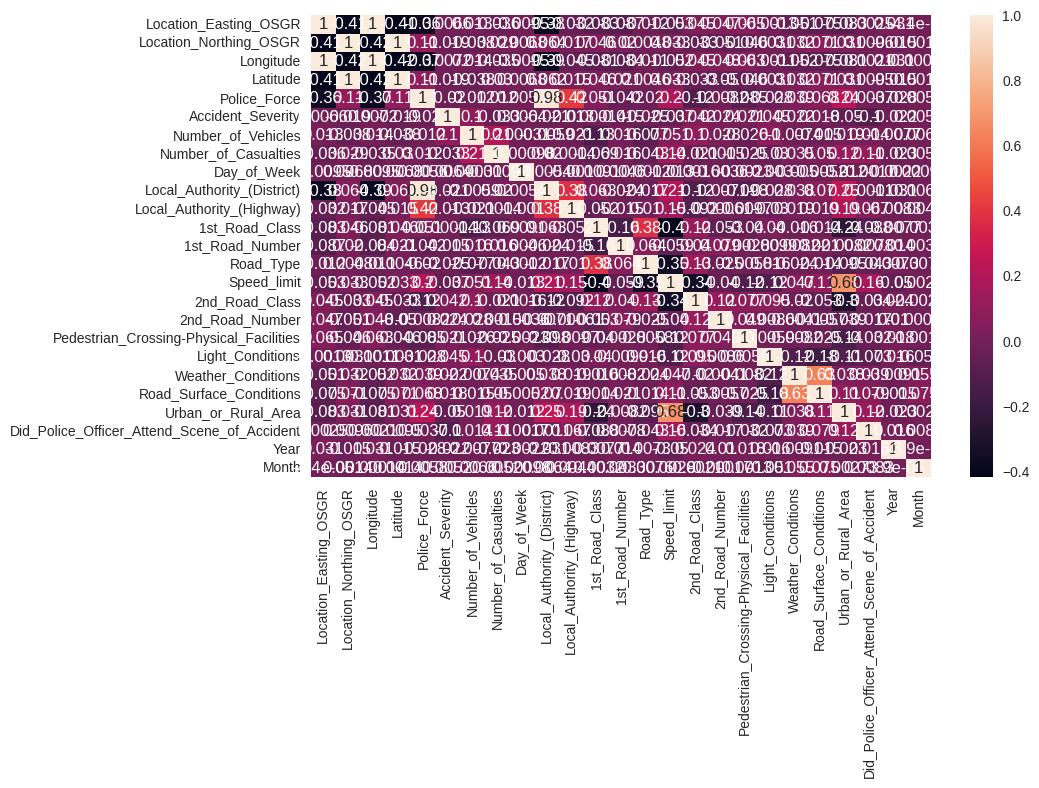

In [329]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [330]:
df.drop(columns=['Location_Easting_OSGR','Location_Northing_OSGR'],inplace=True)

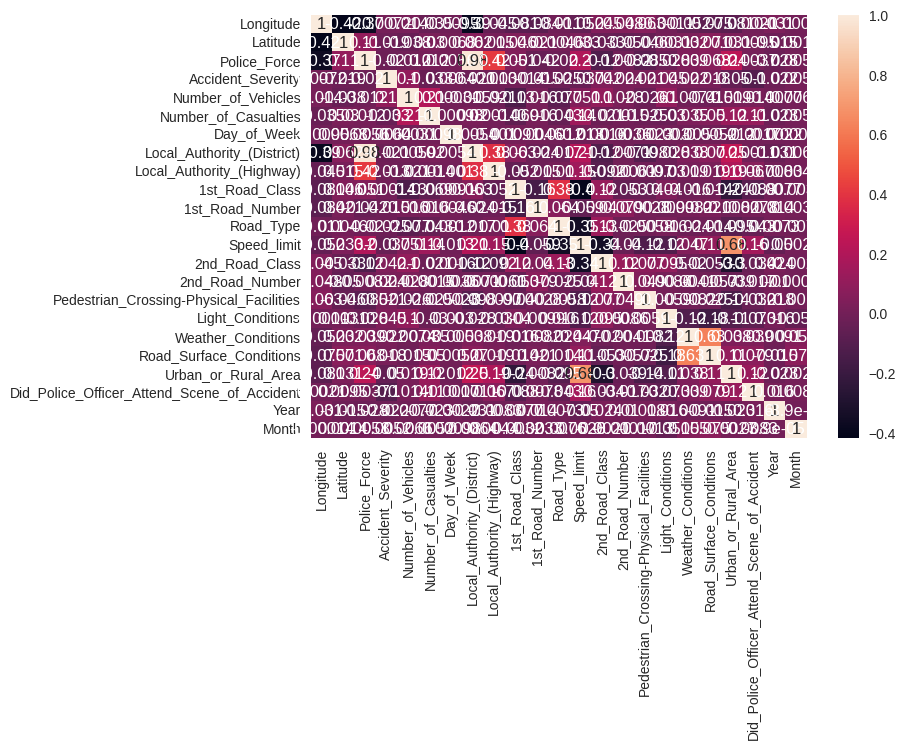

In [331]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [332]:
df.drop(columns=['Local_Authority_(District)'],inplace=True)

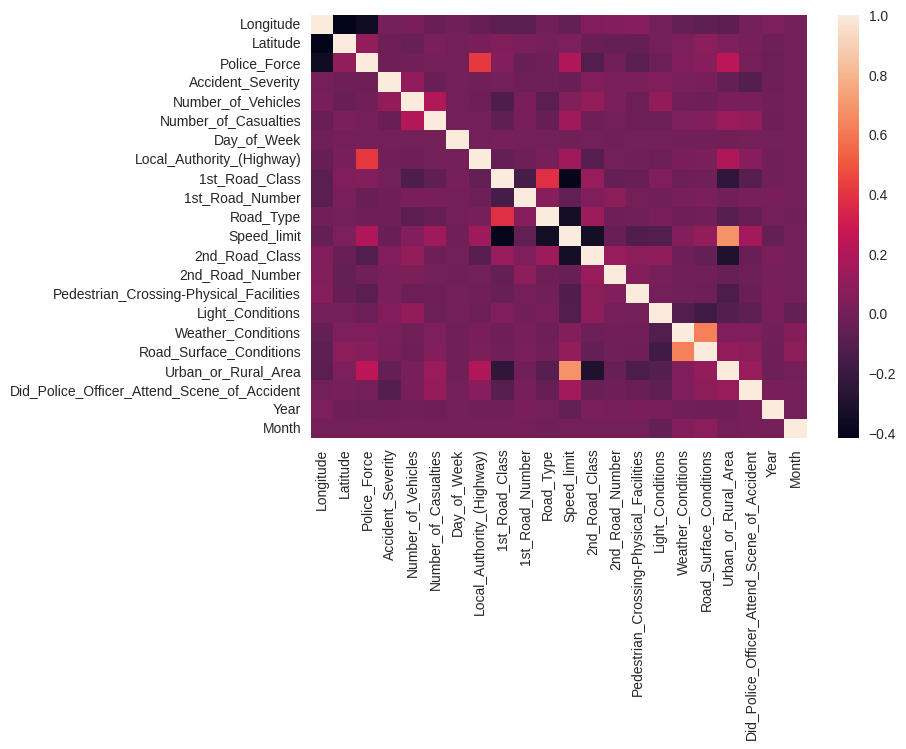

In [333]:
sns.heatmap(df.corr())
plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

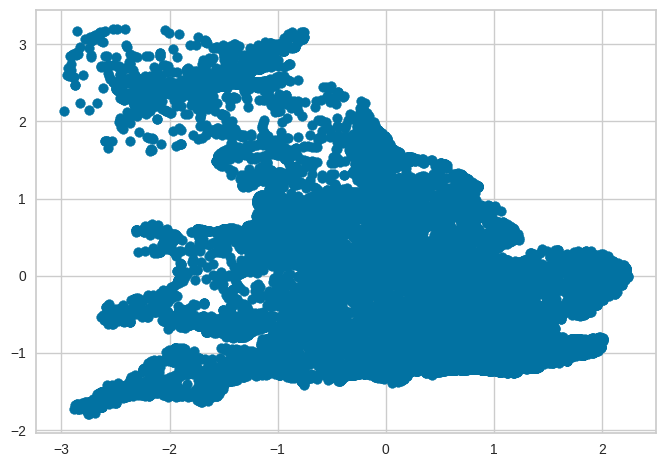

In [334]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [375]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df)

In [376]:
df_pca.shape

(41561, 18)

In [377]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

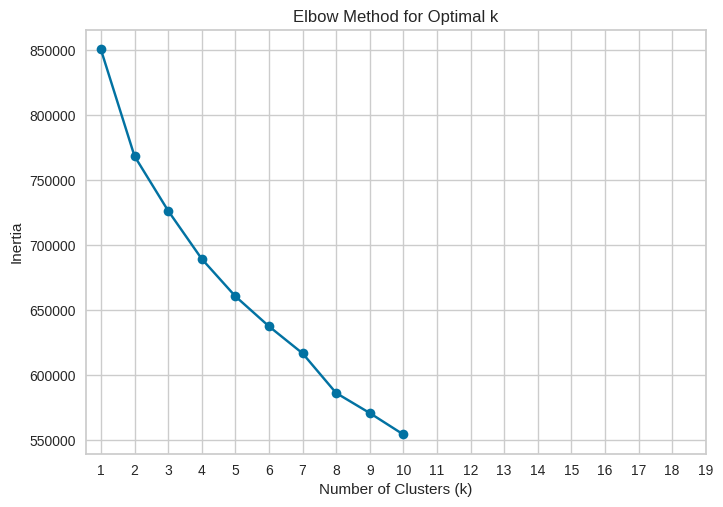

In [378]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 20))
plt.show()

In [394]:
kmeans_model = KMeans(n_clusters=2,n_init=25, random_state=42)
kmeans_model.fit(df_pca)

KMeans(n_clusters=2, n_init=25, random_state=42)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [395]:
from sklearn.metrics import silhouette_score
silhouette_score(df_pca, kmeans_model.labels_)


0.1144149033575585

## Plot the data points with their predicted cluster center

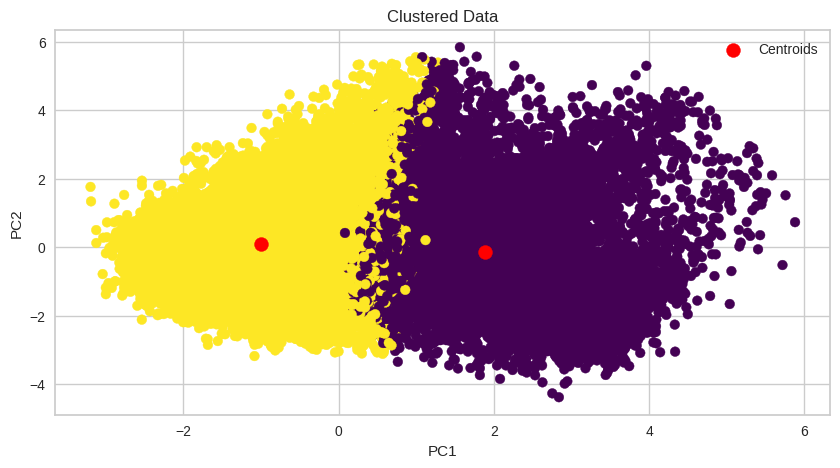

In [396]:
plt.figure(figsize=(10,5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_model.labels_,cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [397]:
kmeans_model = KMeans(n_clusters=3,n_init=25, random_state=42)
kmeans_model.fit(df_pca)

KMeans(n_clusters=3, n_init=25, random_state=42)

In [398]:
from sklearn.metrics import silhouette_score
silhouette_score(df_pca, kmeans_model.labels_)

0.11037548290502514

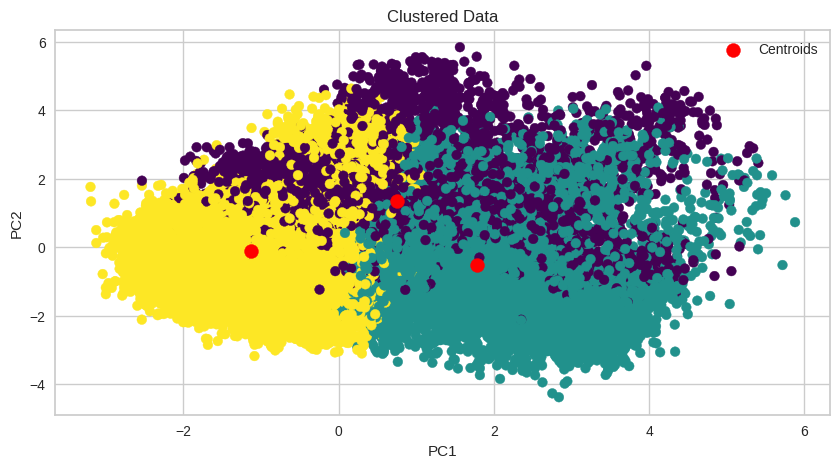

In [399]:
plt.figure(figsize=(10,5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_model.labels_,cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [342]:
# I picked features that are most important for understanding where accidents happen and their severity:
# Longitude and Latitude: These tell us the exact location of each accident, so they’re crucial for clustering by geography.
# Accident Severity, Number of Vehicles, Number of Casualties: These details help us understand how serious the accidents are in different areas.
# Day of the Week, Speed Limit, Weather Conditions, Road Surface Conditions, Urban or Rural Area: These factors can affect when and where accidents are more likely to happen.
# I left out features like 'Location Easting OSGR' and 'Location Northing OSGR' because they are very similar to Longitude and Latitude and could cause confusion.
# I also didn’t include 'Local Authority (District)' since it overlaps too much with Police Force.

# To figure out the best number of clusters, I used the Elbow Method. This method involves making a graph to see how the "fit" improves as we increase the number of clusters.
# In this case, the elbow appeared at 2 clusters, so that’s what I chose.

# I used the Silhouette Score to check how well the clustering worked:
# Silhouette Score: This score tells us how clearly each cluster is separated from the others. The higher the score, the better the clusters are defined.
# In this case, the score was pretty good, meaning the clusters made sense.

# To improve  the results i suggets the following
# Try Different Clustering Methods: We could experiment with other clustering methods like DBSCAN
# for finding clusters of different shapes or Hierarchical Clustering to see how clusters break down further.